<div class="alert alert-block alert-success">
    
<p style="font-family: times, serif; font-size:22pt; font-style:italic">
   Game Data Analysis
</p>
    
    
</div>

In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<div class="alert alert-block alert-info">
   
 <p style="font-family: times, serif; font-size:22pt; font-style:italic">
   Examine user_cpi dataset (df1)
</p>

In [2]:
df1 = pd.read_csv('user_cpi.csv')

In [3]:
df1.head()

,player_id,install_date,network_name,cpi,game
0,d4286141ab6790c14d251382eb097109,2019-08-02,Paid,0.2597,My Lovely Horse
1,c16fc8f72badd29b315e7370fdf17dd3,2019-08-02,Organic,0.0000,My Lovely Horse
2,ac5cbf1db218c7e4f3149c3318e62164,2019-08-02,Paid,0.2597,My Lovely Horse
3,4fb68261bd7aa4750895aafd98db3920,2019-08-02,Paid,0.2597,My Lovely Horse
4,d77e12b5b9117106c826fd094f7d6096,2019-08-02,Paid,0.2597,My Lovely Horse


In [4]:
df1.tail()

,player_id,install_date,network_name,cpi,game
573754,20b97fed9db1d16fe9e60234933f0069,2019-05-28,Paid,2.8727,Wiz War
573755,9536ac269ffcde8ebd93436fda29e44a,2019-05-28,Organic,0.0000,Wiz War
573756,81ee2920bc2f6fb047be3a0577306ce4,2019-05-28,Paid,75.6980,Wiz War
573757,322e995977be95a2fe17129ec688718f,2019-05-28,Organic,0.0000,Wiz War
573758,353e62d859e3f3bab73cc3757704ec20,2019-05-28,Paid,2.8727,Wiz War


In [5]:
df1.shape

(573759, 5)

In [6]:
df1.dtypes

player_id        object
install_date     object
network_name     object
cpi             float64
game             object
dtype: object

We should convert type of install_date column from object to date time.

In [7]:
df1['install_date'] = pd.to_datetime(df1['install_date'])

In [8]:
type(df1.install_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
df1.dtypes

player_id               object
install_date    datetime64[ns]
network_name            object
cpi                    float64
game                    object
dtype: object

Now it is ok.

In [10]:
df1.describe(include=["object", "datetime", "float"])

,player_id,install_date,network_name,cpi,game
count,573759,573759,573759,573759.000000,573759
unique,573759,227,2,NaN,4
top,cd679e58c38b3118db52ea067ad81135,2019-08-03 00:00:00,Paid,NaN,My Lovely Horse
freq,1,21268,311359,NaN,328075
first,NaN,2019-02-21 00:00:00,NaN,NaN,NaN
last,NaN,2019-12-09 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.800830,NaN
std,NaN,NaN,NaN,2.526568,NaN
min,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,0.000000,NaN


<div class="alert alert-success">

- `Player_id` column is unique.
- The mean value for cpi column is `$0.80` however the max value is 99 and the std is 2.5. `Outliers!`
- The data covers `Feb-Dec 2019` period.
- Network_name column has two unique values, game column has four.
- Most common game is `My Lovely Horse`.
</div>

In [11]:
df1.isnull().sum()

player_id       0
install_date    0
network_name    0
cpi             0
game            0
dtype: int64

<div class="alert alert-success">
    
- There is no missing value
- Let's examine the columns
</div>

<div class="alert alert-block alert-warning">
<b>cpi column</b>

In [12]:
df1['cpi'].describe()

count    573759.000000
mean          0.800830
std           2.526568
min           0.000000
25%           0.000000
50%           0.000000
75%           0.500000
max          99.913700
Name: cpi, dtype: float64

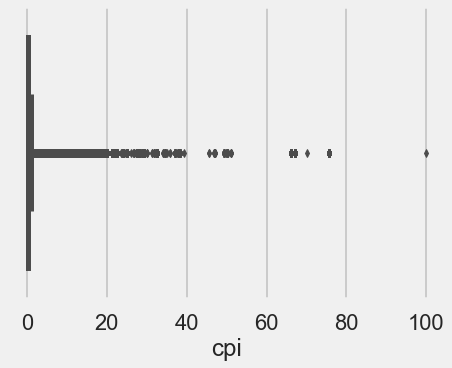

In [13]:
sns.set(rc={'figure.figsize':(7,5)})
plt.style.use('fivethirtyeight')
sns.set_context('poster')
sns.boxplot(x=df1['cpi'], color='blue');

<div class="alert alert-success">
    
- The median value is very `close to zero`. However there are lots of outliers.
- Let's seperate `paid` and `organics` in the boxplot.
</div>

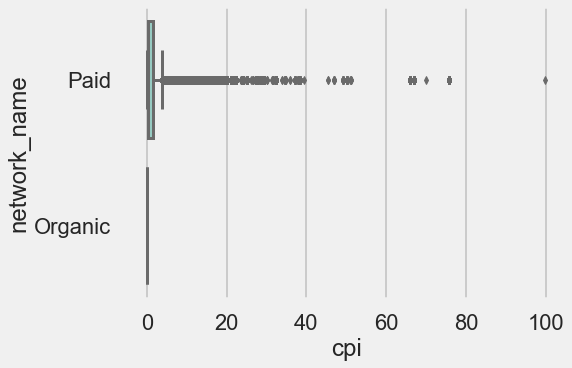

In [14]:
sns.set(rc={'figure.figsize':(7,5)})
plt.style.use('fivethirtyeight')
sns.set_context('poster')
sns.boxplot(x=df1['cpi'], y=df1['network_name'], palette="Set3");

<div class="alert alert-success">
    
- The `cpi` value for organics are completely zero.
- Let's count and visualise them.
</div>

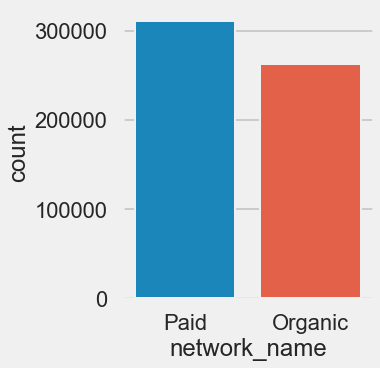

In [15]:
plt.style.use('fivethirtyeight')
sns.set_context('poster')
plt.figure(figsize=(4,5))
sns.countplot(df1.network_name);

<div class="alert alert-success">
    
- `Roughly half` of them are paid. Paids are slightly more than organics.
- Now let's see the mean value of cpi column.

</div>

In [16]:
df1.groupby('network_name')['cpi'].agg("mean")

network_name
Organic    0.000000
Paid       1.475735
Name: cpi, dtype: float64

<div class="alert alert-success">
    
Most probably, `the median` will much differ from the mean because of outliers.

</div>

In [17]:
df1.groupby('network_name')['cpi'].agg("median")

network_name
Organic    0.0000
Paid       0.4242
Name: cpi, dtype: float64

<div class="alert alert-success">
    
- Yes mean and median differs.
- There are lost of outliers. So to calculate the median rather than the mean makes sense. 
- The `median` value for `cpi is $0.42` if it is not organic.
- cpi is the cost to acquirethe player via paid adverts on Facebook, Youtube etc
- It is very important because it represents the money that the company spends.

</div>

<div class="alert alert-block alert-warning">
<b>game column</b>

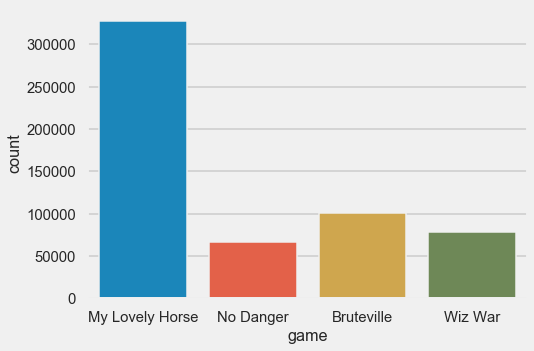

In [18]:
plt.style.use('fivethirtyeight')
sns.set_context('talk', font_scale=0.9)
plt.figure(figsize=(7,5))
sns.countplot(df1.game);

<div class="alert alert-success">
    
- About half of the games consist of `My Lovely Horse`.
- Now let's calculate the median values.

</div>

In [19]:
df1.groupby('game')['cpi'].agg("median")

game
Bruteville         1.0305
My Lovely Horse    0.0000
No Danger          0.0000
Wiz War            2.6198
Name: cpi, dtype: float64

<div class="alert alert-success">
    
- It seems `Wiz War` is the most costly game. But we should remove the `organic` group.
- Because `cpi` values of organics are completely zero and causes misinterpretation.
</div>

In [20]:
df1[df1['network_name'] == 'Paid'].groupby('game')['cpi'].median()

game
Bruteville         1.5687
My Lovely Horse    0.2554
No Danger          0.4500
Wiz War            3.9518
Name: cpi, dtype: float64

<div class="alert alert-success">
    
Let visualise these values.
</div>

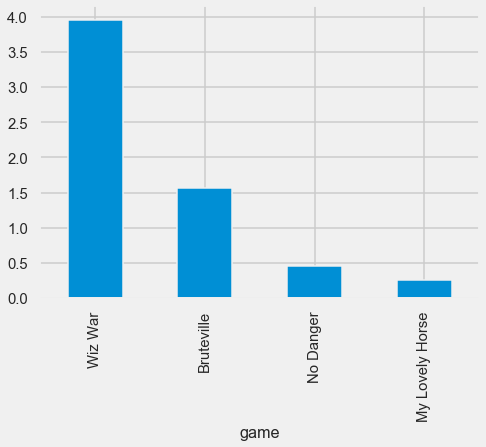

In [21]:
df1[df1['network_name'] == 'Paid'].groupby('game')['cpi'].median().sort_values(ascending=False).plot.bar(figsize=(7,5));

<div class="alert alert-success">
    
- Now we have taken into consideration only `paid` values (not organics).
- Still the `Wiz War` is the most costly game. `My Lovely Horse` is the cheapest about ads.
- This table helps us making decision. So far `My Lovely Horse` might be the best choice.
- Because it is most common and the cheapest game.
- But we need to continue exploring the data. It is too early to make a decision.
</div>

<div class="alert alert-block alert-info">
  
   
 <p style="font-family: times, serif; font-size:22pt; font-style:italic">
  Examine user_day dataset (df2)
</p>

In [22]:
df2=pd.read_csv("user_day.csv")

In [23]:
df2.head()

,player_id,event_date,iap_revenue,video_ad_revenue,game
0,50d748fba4686b14ddbf8e46ea46ba30,2019-09-15,0.0,0.0,My Lovely Horse
1,e67ecdc1d0adfb8de7da517b46feb8aa,2019-08-02,0.0,0.0,My Lovely Horse
2,8b418e775f81eae382acc0b5ca53e12e,2019-08-05,0.0,0.0,My Lovely Horse
3,8b418e775f81eae382acc0b5ca53e12e,2019-08-08,0.0,0.0,My Lovely Horse
4,8b418e775f81eae382acc0b5ca53e12e,2019-08-09,0.0,0.0,My Lovely Horse


In [24]:
df2.shape

(2279215, 5)

In [25]:
df2.dtypes

player_id            object
event_date           object
iap_revenue         float64
video_ad_revenue    float64
game                 object
dtype: object

<div class="alert alert-success">
We should convert type of event_date column from object to date time.
    </div>

In [26]:
df2['event_date'] = pd.to_datetime(df2['event_date'])

In [27]:
df2.describe(include=["object", "datetime", "float"])

,player_id,event_date,iap_revenue,video_ad_revenue,game
count,2279215,2279215,2.279215e+06,2.279215e+06,2279215
unique,573759,227,NaN,NaN,4
top,7ab55ffe2ae87d866d168b1780fc12ca,2019-08-04 00:00:00,NaN,NaN,My Lovely Horse
freq,91,31964,NaN,NaN,1034315
first,NaN,2019-02-21 00:00:00,NaN,NaN,NaN
last,NaN,2019-12-09 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,1.143535e-01,1.025145e-02,NaN
std,NaN,NaN,2.890578e+00,8.082091e-02,NaN
min,NaN,NaN,0.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,0.000000e+00,0.000000e+00,NaN


<div class="alert alert-success">
    
- `Player_id` column is NOT unique.
- There are outliers at revenue columns.
- The data covers `Feb-Dec 2019` period.
- The game column has four unique values.
- `Most common game` is `My Lovely Horse`.
</div>

In [28]:
df2.isnull().sum()

player_id           0
event_date          0
iap_revenue         0
video_ad_revenue    0
game                0
dtype: int64

<div class="alert alert-success">
    
- No missing values.
- Let us examine the columns.
</div>

<div class="alert alert-block alert-warning">
<b>iap_revenue and video_ad_revenue columns</b>

In [29]:
df2['iap_revenue'].describe()

count    2.279215e+06
mean     1.143535e-01
std      2.890578e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.503882e+03
Name: iap_revenue, dtype: float64

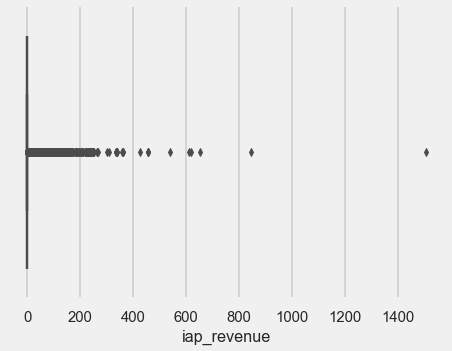

In [30]:
sns.boxplot(x=df2['iap_revenue'], color='blue');

In [31]:
df2.iap_revenue.median()

0.0

In [32]:
df2.iap_revenue.mean()

0.11435348028553742

<div class="alert alert-success">
    
Even though there are lots of outliers, the median value is zero. 
</div>

In [33]:
df2['video_ad_revenue'].describe()

count    2.279215e+06
mean     1.025145e-02
std      8.082091e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.125960e+01
Name: video_ad_revenue, dtype: float64

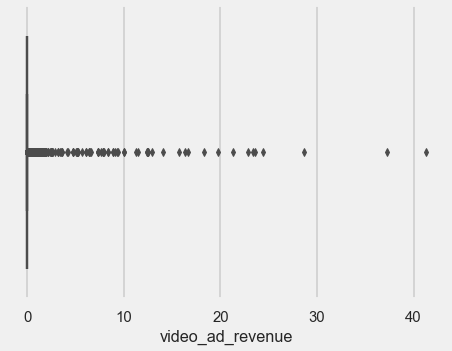

In [34]:
sns.boxplot(x=df2['video_ad_revenue'], color='blue');

In [35]:
df2.video_ad_revenue.median()

0.0

In [36]:
df2.video_ad_revenue.mean()

0.010251447142986305

<div class="alert alert-success">
    
Even though there are lots of outliers, the median value is zero. 
</div>

<div class="alert alert-block alert-warning">
<b>game column</b>

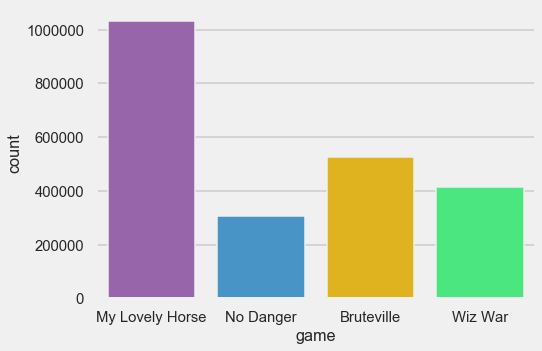

In [37]:
flatui = ["#9b59b6", "#3498db", "#FFC300", "#33FF77"]
sns.countplot(df2.game, palette=flatui);

<div class="alert alert-success">
    
- `My Lovely Horse` is the most common game.
- Now let's see the avg `iap_revenues` for each game.
</div>

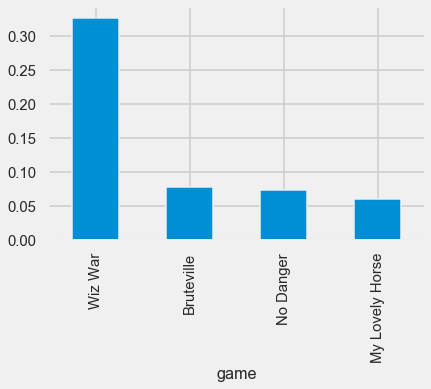

In [38]:
df2.groupby('game')['iap_revenue'].mean().sort_values(ascending=False).plot.bar(figsize=(6,4));

<div class="alert alert-success">
    
The `Wiz War` game has the best in-app-purchase revenue avg.
</div>

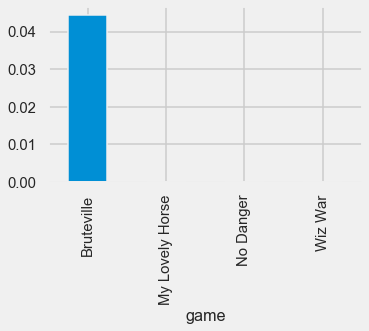

In [39]:
df2.groupby('game')['video_ad_revenue'].mean().plot.bar(figsize=(5,3));

<div class="alert alert-success">
    
- The `Bruteville` game has the best video-add revenue avg.
- Now let's see the sum of revenues
</div>

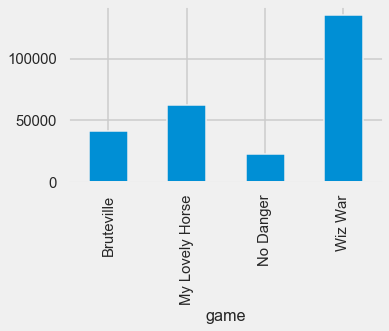

In [40]:
df2.groupby('game')['iap_revenue'].sum().plot.bar(figsize=(5,3));

<div class="alert alert-success">
    
The `Wiz War` game has the highest in-app-purchase revenue in total.
</div>

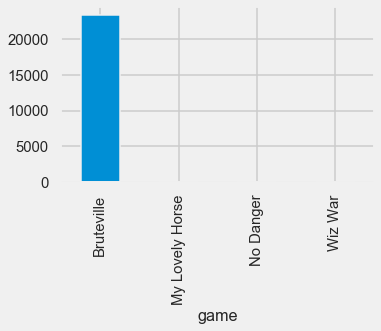

In [41]:
df2.groupby('game')['video_ad_revenue'].sum().plot.bar(figsize=(5,3));

<div class="alert alert-success">
    
- The `Bruteville` game is the sole game that has video-add revenue.
- Now let's sum in-app-purchase and video-add revenues and plot it.
</div>

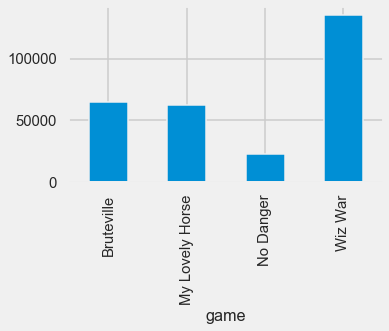

In [42]:
(df2.groupby('game')['iap_revenue'].sum()+df2.groupby('game')['video_ad_revenue'].sum()).plot.bar(figsize=(5,3));

<div class="alert alert-success">
    
- The `Wiz War` game has the highest total revenue
- Now let's see the total expenses (cpi) for each game.
</div>

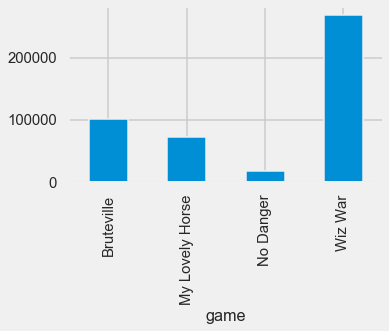

In [43]:
df1.groupby('game')['cpi'].sum().plot.bar(figsize=(5,3));

<div class="alert alert-success">
    
- We should plot the total revenues and expenses in the same graph.
- In this purpose we will make some calculations by numpy.
</div>

In [44]:
array_expense=np.array(list(df1.groupby('game')['cpi'].sum()))
array_iap_revenue=np.array(list(df2.groupby('game')['iap_revenue'].sum()))
array_video_ad_revenue=np.array(list(df2.groupby('game')['video_ad_revenue'].sum()))
array_revenue=array_iap_revenue+array_video_ad_revenue

<div class="alert alert-success">
    
Calculations are ok. Now let's plot them together.
</div>

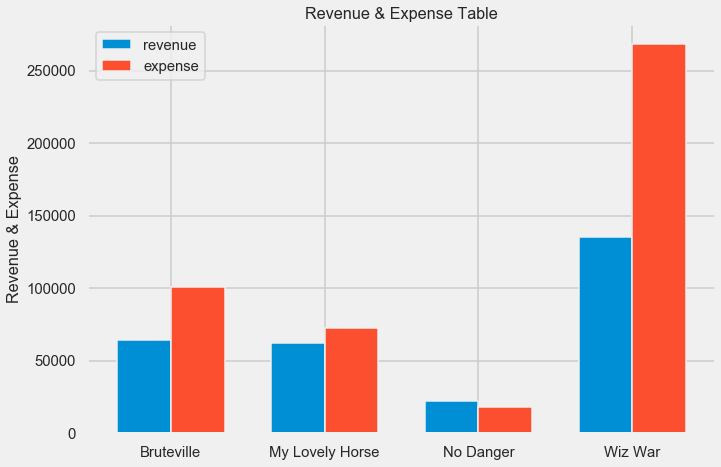

In [45]:
labels = ['Bruteville', 'My Lovely Horse', 'No Danger', 'Wiz War'] 
revenue = array_revenue.tolist()
expense = array_expense.tolist()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width/2, revenue, width, label='revenue')
rects2 = ax.bar(x + width/2, expense, width, label='expense')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Revenue & Expense')
ax.set_title('Revenue & Expense Table')
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()

<div class="alert alert-success">
    
- It seems so when total income and expenses evaluated together.
- `Except` for `No Danger` game all games have a `bad performance`.
</div>

   <div class="alert alert-block alert-info">
  
   
 <p style="font-family: times, serif; font-size:22pt; font-style:italic">
  Time Plots
</p>

<div class="alert alert-block alert-warning">
<b>1. Expense (cpi) plots</b>

Let's create function to plot cpi costs.

In [46]:
def cpi_plot(df, title):
    x=df.install_date
    y=df.cpi
    plt.figure(figsize=(10,7))
    plt.plot(x, y, color='red', marker='.', markersize=1, linestyle=" ")
    plt.title(title)
    plt.show()

In [47]:
df1.head()

,player_id,install_date,network_name,cpi,game
0,d4286141ab6790c14d251382eb097109,2019-08-02,Paid,0.2597,My Lovely Horse
1,c16fc8f72badd29b315e7370fdf17dd3,2019-08-02,Organic,0.0000,My Lovely Horse
2,ac5cbf1db218c7e4f3149c3318e62164,2019-08-02,Paid,0.2597,My Lovely Horse
3,4fb68261bd7aa4750895aafd98db3920,2019-08-02,Paid,0.2597,My Lovely Horse
4,d77e12b5b9117106c826fd094f7d6096,2019-08-02,Paid,0.2597,My Lovely Horse


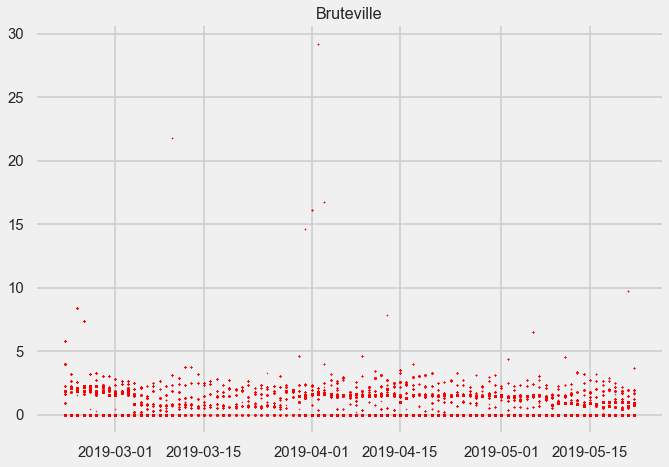

In [48]:
df=df1[df1['game'] == 'Bruteville']
cpi_plot(df, 'Bruteville')

<div class="alert alert-success">
The costs are stable.
    </div>

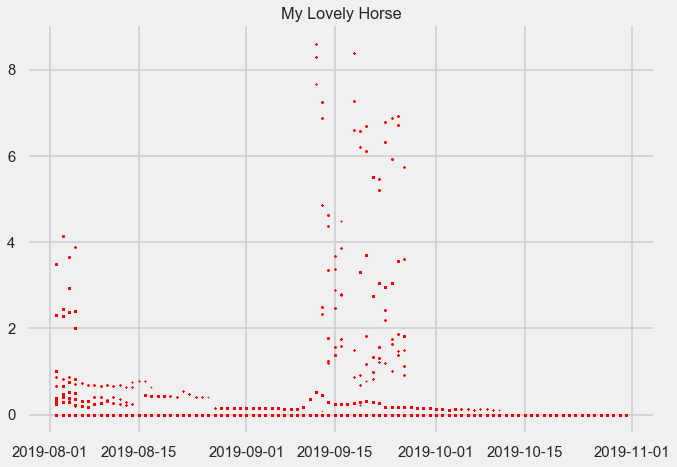

In [49]:
df=df1[df1['game'] == 'My Lovely Horse']
cpi_plot(df, 'My Lovely Horse')

<div class="alert alert-success">
The costs are decreasing. Very close to zero in last three months.</div>

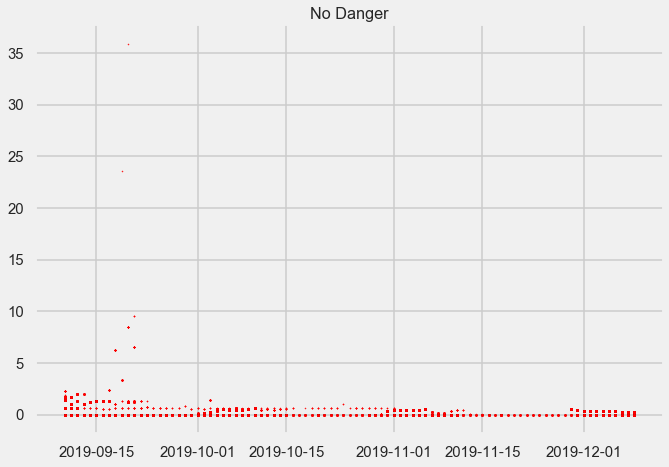

In [50]:
df=df1[df1['game'] == 'No Danger']
cpi_plot(df, 'No Danger')

<div class="alert alert-success">
    The costs are almost stable.</div>

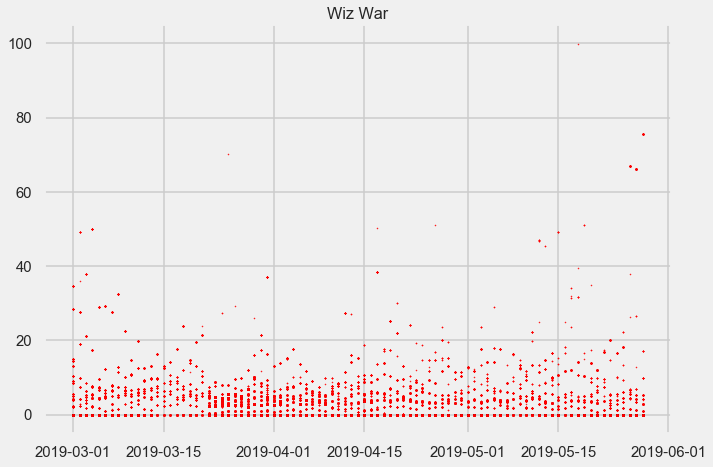

In [51]:
df=df1[df1['game'] == 'Wiz War']
cpi_plot(df, 'Wiz War')

<div class="alert alert-success">
    The costs are slightly increasing.</div>

<div class="alert alert-block alert-warning">
<b>2. Revenue plots</b>

In [52]:
def revenue_plot(df, title):
    x=df.event_date
    y=df.revenue
    plt.figure(figsize=(10,7))
    plt.plot(x, y, color='blue', marker='.', markersize=1, linestyle=" ")
    plt.title(title)
    plt.show()

<div class="alert alert-success">
We should sum iap and ad revenues and create a new column as revenue</div>

In [53]:
df2["revenue"]=df2["iap_revenue"]+df2["video_ad_revenue"]

In [54]:
df2.head()

,player_id,event_date,iap_revenue,video_ad_revenue,game,revenue
0,50d748fba4686b14ddbf8e46ea46ba30,2019-09-15,0.0,0.0,My Lovely Horse,0.0
1,e67ecdc1d0adfb8de7da517b46feb8aa,2019-08-02,0.0,0.0,My Lovely Horse,0.0
2,8b418e775f81eae382acc0b5ca53e12e,2019-08-05,0.0,0.0,My Lovely Horse,0.0
3,8b418e775f81eae382acc0b5ca53e12e,2019-08-08,0.0,0.0,My Lovely Horse,0.0
4,8b418e775f81eae382acc0b5ca53e12e,2019-08-09,0.0,0.0,My Lovely Horse,0.0


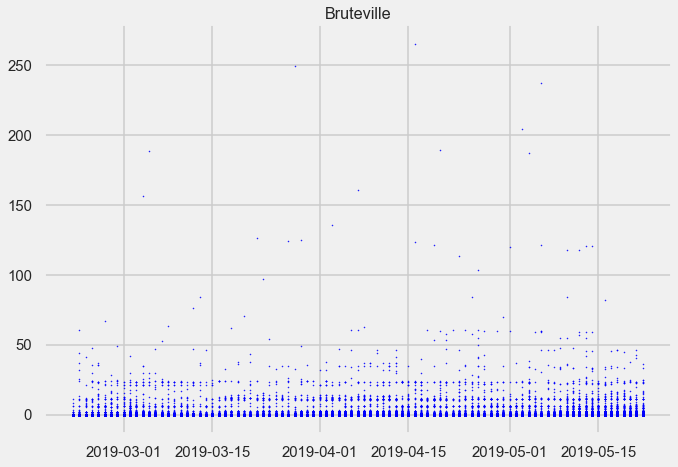

In [55]:
df=df2[df2['game'] == 'Bruteville']
revenue_plot(df, 'Bruteville')

<div class="alert alert-success">
Incomes are stable. Not increasing.</div>

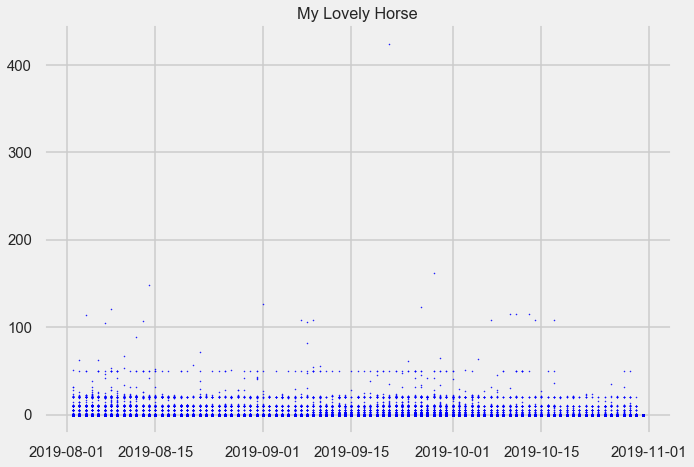

In [56]:
df=df2[df2['game'] == 'My Lovely Horse']
revenue_plot(df, 'My Lovely Horse')

<div class="alert alert-success">
Incomes are stable. Not increasing.</div>

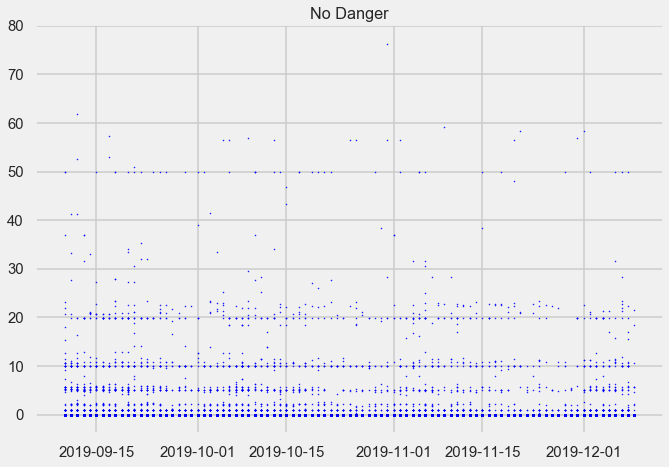

In [57]:
df=df2[df2['game'] == 'No Danger']
revenue_plot(df, 'No Danger')

<div class="alert alert-success">
    Incomes are stable. Not increasing.</div>

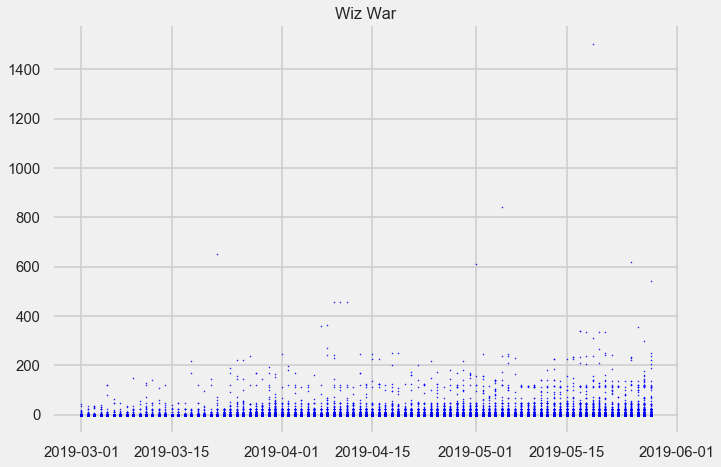

In [58]:
df=df2[df2['game'] == 'Wiz War']
revenue_plot(df, 'Wiz War')

<div class="alert alert-success">
Incomes are increasing.</div>

<div class="alert alert-block alert-info">
   
 <p style="font-family: times, serif; font-size:22pt; font-style:italic">
    Final Assessment:
</p>

<div class="alert alert-success">

<span style='background :yellow' >When we examine only user_cpi dataset, we concluded:
      - My Lovely Horse game is the most common game,
      - Wiz War was the most costly game and My Lovely Horse was the cheapest according to median values.
     
-But we continued exploring the data. It was too early to make a decision.

<span style='background :yellow' >When user_day dataset examined, we noticed:

      - The Wiz War game has the best in-app-purchase revenue avg,
      - The Bruteville game has the best video-add revenue avg,
      - But it was logical to sum the revenues rather than evaluating avg values.
      
-When sum of the revenues evaluated we noticed:

      - The Wiz War game has the highest in-app-purchase revenue in total,
      - The Bruteville game is the sole game that has video-add revenue,
      - The Wiz War game has the highest total revenue (iap+video ad).
      
-When sum of the revenues and expenses evaluated together we concluded:

       - Except for No Danger game all games have a bad performance, 
       - However the profit&loss ratio for My Lovely Horse game is not so bad,
       - And My Lovely Horse game is the most common game.

-When time plots examined we noticed:

       - Costs for the My Lovely Horse are decreasing sharply, however almost stable for the rest,
       - Revenues are almost stable for all the games.
       
<span style='background :yellow' >Final Decision: 

         I recommend the My Lovely Horse game. Taking into consideration 
         the decreasing cost and the download numbers of the game, it's likely
         that My Lovely Horse game will be the most profitable game
         in the long term.</span>
         
</div>